In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

## Elevation

In [2]:
import geopandas as gpd
from rasterstats import zonal_stats

zones = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/turkey/clean_shp.shp"
values = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/elevation/ELE.tif"

gdf = gpd.read_file(zones)

stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["mean"]))
gdf = gdf.join(stats)


/Users/shivyucel/opt/anaconda3/envs/geo2/lib/python3.11/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [236]:
gdf.rename(columns = {'mean':'mean_elev'}, inplace=True)

Text(0.5, 1.0, 'Average elevation (m) in Turkey districts')

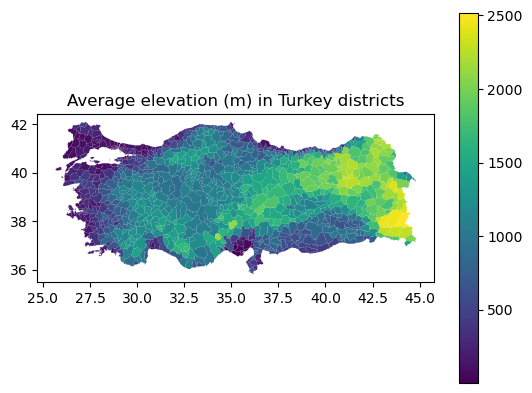

In [237]:
gdf.plot(column='mean_elev', legend=True )
plt.title("Average elevation (m) in Turkey districts")

In [238]:
gdf

,OBJECTID,adm2,adm2_en,adm1,adm1_en,pcode,Shape_Leng,Shape_Area,location,geometry,mean_elev
0,1,Sisli,SISLI,Istanbul,ISTANBUL,TUR034035,0.187408,0.001147,"Sisli, Istanbul","POLYGON ((29.00802 41.08488, 29.00928 41.08346...",90.235294
1,2,Cigli,CIGLI,Izmir,IZMIR,TUR035010,1.138818,0.014430,"Cigli, Izmir","POLYGON ((27.06797 38.46423, 27.06785 38.46418...",56.341232
2,3,Sile,SILE,Istanbul,ISTANBUL,TUR034034,1.862735,0.085721,"Sile, Istanbul","POLYGON ((29.84881 41.01343, 29.84697 41.01245...",126.262388
3,4,Siran,SIRAN,Gumushane,GUMUSHANE,TUR029005,1.425890,0.102039,"Siran, Gumushane","POLYGON ((39.32492 40.29221, 39.32482 40.29085...",1721.576190
4,5,Sirvan,SIRVAN,Siirt,SIIRT,TUR056006,1.372220,0.096102,"Sirvan, Siirt","POLYGON ((41.95335 38.00632, 41.95321 38.00755...",1377.412824
...,...,...,...,...,...,...,...,...,...,...,...
968,969,Sultanhani,SULTANHANI,Aksaray,AKSARAY,TUR068008,0.874635,0.047674,"Sultanhani, Aksaray","POLYGON ((33.71588 38.1074, 33.71464 38.10828,...",948.817919
969,970,Kemalpasa,KEMALPASA,Artvin,ARTVIN,TUR008006,0.405790,0.008003,"Kemalpasa, Artvin","POLYGON ((41.54029 41.42134, 41.53431 41.42272...",494.120690
970,971,Derecik,DERECIK,Hakkari,HAKKARI,TUR030005,1.135608,0.046118,"Derecik, Hakkari","POLYGON ((44.55266 37.13612, 44.55225 37.136, ...",1445.472180
971,972,Aksaray,AKSARAY,Aksaray,AKSARAY,TUR068002,3.009736,0.365024,"Aksaray, Aksaray","POLYGON ((33.73787 38.70942, 33.74138 38.70902...",1101.379684


In [239]:
gdf['location'] = gdf['adm2'] + ', ' + gdf['adm1']

## Coastal

In [240]:
coast = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/turkey/turkey_coastline.shp')
coast['coast'] = 1

coast = gdf.merge(coast, on='geometry')

In [241]:
gdf['coast'] = [1 if x in coast['location'].unique() else 0 for x in gdf['location']]

<Axes: >

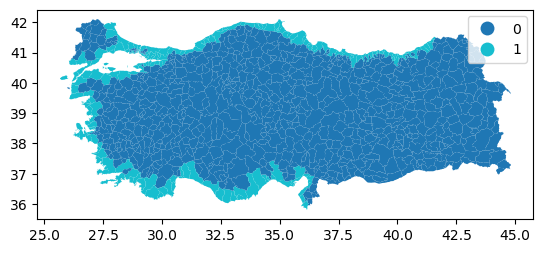

In [242]:
gdf.plot(column='coast', categorical= True, legend=True)

## Human Development Index

In [243]:
import pandas as pd

In [244]:
hdi = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/turkey/GDL-Subnational-HDI-data.csv')

In [245]:
hdi['Region'] = [x.split('(')[0].strip() for x in hdi['Region']]

In [246]:
hdi['Region'] = hdi['Region'].map({'Aegean': 'Izmir, Aydin, Denizli, Mugla, Manisa, Afyonkarahisar, Kutahya, Usak', 
    'Central Anatolia': 'Kirikkale, Aksaray, Nigde, Nevsehir, Kirsehir, Kayseri, Sivas, Yozgat', 
    'Central East Anatolia':'Malatya, Elazig, Bingol, Tunceli, Van, Mus, Bitlis, Hakkari',
    'East Black Sea': 'Trabzon, Ordu, Giresun, Rize, Artvin, Gumushane',
    'East Marmara':'Bursa, Eskisehir, Bilecik, Kocaeli, Sakarya, Duzce, Bolu, Yalova',
                   'Istanbul':'Istanbul',
    'Mediterranean':'Antalya, Isparta, Burdur, Adana, Mersin, Hatay, Kahramanmaras, Osmaniye',
    'North East Anatolia':'Erzurum, Erzincan, Bayburt, Agri, Kars, Igdir, Ardahan',
    'South East Anatolia':'Gaziantep, Adiyaman, Kilis, Sanliurfa, Diyarbakir, Mardin, Batman, Sirnak, Siirt',
    'West Anatolia':'Ankara, Konya, Karaman',
    'West Black Sea': 'Zonguldak, Karabuk, Bartin, Kastamonu, Cankiri, Sinop, Samsun, Tokat, Corum, Amasya',
    'West Marmara': 'Tekirdag, Edirne, Kirklareli, Balikesir, Canakkale'})
    

In [247]:
hdi['Region'] = [x.split(', ') for x in hdi['Region']]

In [248]:
hdi = hdi.explode('Region').reset_index(drop=True)

In [249]:
gdf['adm1'] = [x.title() for x in gdf['adm1_en']]

In [250]:
hdi.rename(columns={'2021':'HDI'}, inplace=True)

In [251]:
gdf = gdf.merge(hdi[['Region', 'HDI']], left_on='adm1', right_on='Region')

Text(0.5, 1.0, 'Provincial HDI Turkey')

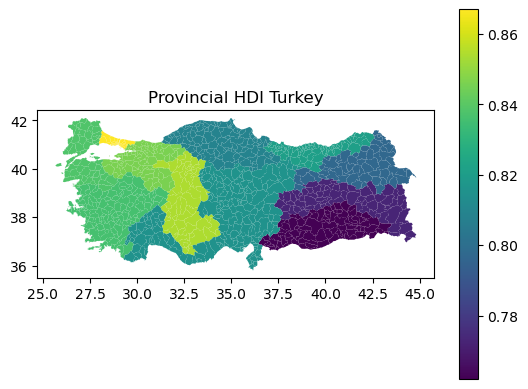

In [252]:
gdf.plot(column='HDI', legend=True)
plt.title('Provincial HDI Turkey')

## Population density

In [253]:
#using WorldPop Global2 Populatoin Data Set
values = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/paper2_repo/__clean/Global2/turkey/pop/tur_pop_2022_CN_1km_R2025A_UA_v1.tif"


stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
gdf = gdf.join(stats)


# choose correct projection for country
gdf = gdf.to_crs("EPSG:3035")  # EPSG:3035 — ETRS89 / LAEA Europe


#Manually calculate area
gdf['area'] = gdf.geometry.area / 1e6

#manually calculate population density
gdf['popdens'] = gdf['sum'] / gdf['area']


gdf = gdf[['adm1', 'adm2', 'geometry', 'mean_elev', 'location', 'coast', 'HDI', 'popdens']]

gdf['adm0'] = 'Turkey'

#set projection back to 4326 to align with tiff
gdf.to_crs(4326, inplace=True)

In [254]:
gdf.rename(columns={'mean':'popdens'}, inplace=True)

<Axes: >

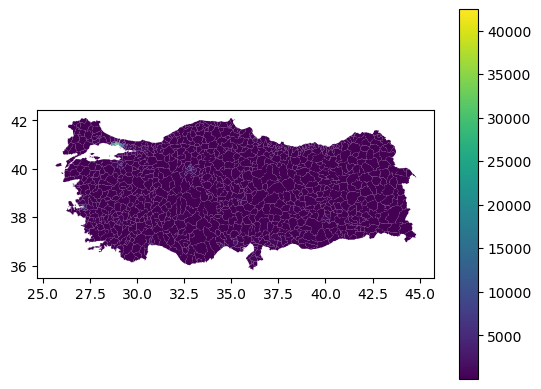

In [255]:
gdf.plot(column='popdens', legend=True)

In [256]:
#gdf.rename(columns={'adm2_tr':'adm2', 'adm1_tr':'adm1'}, inplace=True)

In [259]:
import unidecode


gdf['adm2'] = gdf['adm2'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
gdf['adm1'] = gdf['adm1'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


#gdf['adm2'] = [x.replace('Amasya', 'Amasya District') for x in gdf['adm2']]
gdf['adm2'] = [x.replace('Marmara Ereglisi', 'Marmaraereglisi') for x in gdf['adm2']]
#gdf['adm2'] = [x.replace('Hakkari', 'Hakkâri') for x in gdf['adm2']]
gdf['adm2'] = [x.replace('Oniki Subat', 'Onikisubat') for x in gdf['adm2']]
#gdf['adm2'] = [x.replace('Sarkişla', 'Şarkişla') for x in gdf['adm2']]


gdf['location'] = gdf['adm2'] + ', ' + gdf['adm1']




In [260]:
full_df = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/daily_max/Turkey/daily_max_turkey.csv')

In [261]:
[x for x in full_df['location'].unique() if x not in gdf['location'].unique()]

[]

In [262]:
gdf = gdf[['adm1', 'adm2', 'location', 'geometry', 'HDI', 'mean_elev', 'coast', 'popdens']]

## Age

In [264]:
import glob

In [265]:
gdf['over60_pop'] = 0
for file in glob.glob('/Users/shivyucel/Documents/projects/DPhil/Code_Data/paper2_repo/__clean/Global2/turkey/age/*'):
    
    values = file
    
    pop_total = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['over60_pop'] += pop_total['sum']




In [266]:
for file in glob.glob('/Users/shivyucel/Documents/projects/DPhil/Code_Data/paper2_repo/__clean/Global2/turkey/pop/*'):
    
    values = file
    
    over_60 = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['pop_total'] = over_60['sum']

In [267]:
gdf['over60_propor'] = gdf['over60_pop'] / gdf['pop_total']

Text(0.5, 1.0, 'Age 60+ population proportion')

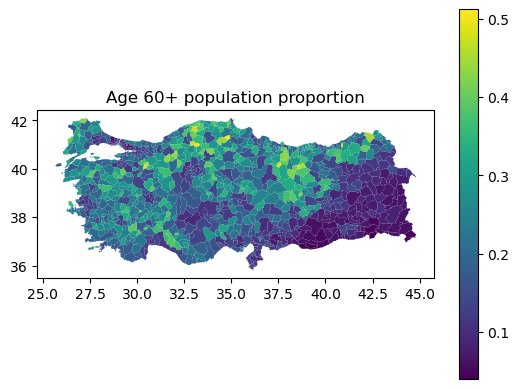

In [268]:
gdf.plot(column='over60_propor', legend=True)
plt.title("Age 60+ population proportion")

Text(0.5, 1.0, 'Age 60+ population proportion')

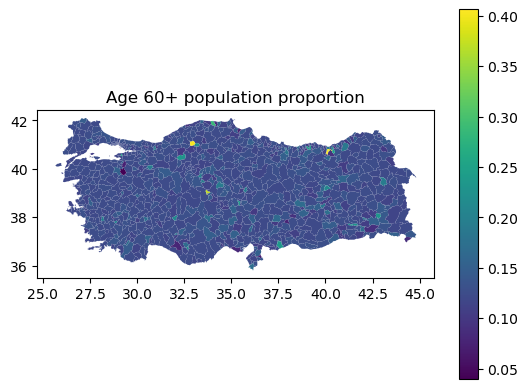

In [9]:
gdf_old.plot(column='over60_pro', legend=True)
plt.title("Age 60+ population proportion")

In [269]:
HDI_subset = gdf.drop_duplicates('HDI')

In [270]:
deciles = pd.qcut(HDI_subset['HDI'], 10, labels= range(1,11)).astype(int)

In [271]:
HDI_subset['HDI_dec'] = deciles

/Users/shivyucel/opt/anaconda3/envs/geo2/lib/python3.11/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [272]:
gdf = gdf.merge(HDI_subset[['HDI', 'HDI_dec']], on='HDI')

In [273]:
gdf['popden_dec'] = pd.qcut(gdf['popdens'], 10, labels= range(1,11)).astype(int)
gdf['over60_dec'] = pd.qcut(gdf['over60_propor'], 10, labels= range(1,11)).astype(int)

In [275]:
gdf

,adm1,adm2,location,geometry,HDI,mean_elev,coast,popdens,over60_pop,pop_total,over60_propor,HDI_dec,popden_dec,over60_dec
0,Istanbul,Sisli,"Sisli, Istanbul","POLYGON ((29.00802 41.08488, 29.00928 41.08346...",0.867,90.235294,1,28453.055819,35752.191101,304742.218750,0.117319,10,10,2
1,Izmir,Cigli,"Cigli, Izmir","POLYGON ((27.06797 38.46423, 27.06785 38.46418...",0.836,56.341232,1,1561.397845,31295.564697,218172.968750,0.143444,7,10,3
2,Istanbul,Sile,"Sile, Istanbul","POLYGON ((29.84881 41.01343, 29.84697 41.01245...",0.867,126.262388,1,54.550907,10543.610397,43629.375000,0.241663,10,6,7
3,Gumushane,Siran,"Siran, Gumushane","POLYGON ((39.32492 40.29221, 39.32482 40.29085...",0.821,1721.576190,0,20.342470,4621.017914,19627.066406,0.235441,6,3,7
4,Siirt,Sirvan,"Sirvan, Siirt","POLYGON ((41.95335 38.00632, 41.95321 38.00755...",0.762,1377.412824,0,22.656942,1896.631256,21205.375000,0.089441,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Aksaray,Sultanhani,"Sultanhani, Aksaray","POLYGON ((33.71588 38.1074, 33.71464 38.10828,...",0.816,948.817919,0,24.608641,1295.328585,11401.448242,0.113611,5,4,2
969,Artvin,Kemalpasa,"Kemalpasa, Artvin","POLYGON ((41.54029 41.42134, 41.53431 41.42272...",0.821,494.120690,1,101.550050,1277.748444,7539.918945,0.169464,6,8,4
970,Hakkari,Derecik,"Derecik, Hakkari","POLYGON ((44.55266 37.13612, 44.55225 37.136, ...",0.773,1445.472180,0,50.707068,1045.645340,23069.142578,0.045327,1,6,1
971,Aksaray,Aksaray,"Aksaray, Aksaray","POLYGON ((33.73787 38.70942, 33.74138 38.70902...",0.816,1101.379684,0,92.341432,37127.337891,326824.125000,0.113600,5,7,2


In [276]:
gdf.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/turkey/merged_Global2.shp')

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_70487/2672246410.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/turkey/merged_Global2.shp')
/Users/shivyucel/opt/anaconda3/envs/geo2/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'over60_propor' to 'over60_pro'
  ogr_write(


In [3]:
gdf = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/turkey/merged_Global2.shp')

In [4]:
gdf_old = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/turkey/merged.shp')

In [10]:
gdf['over60_pro'].describe()

count    973.000000
mean       0.209992
std        0.095812
min        0.039398
25%        0.132054
50%        0.201520
75%        0.278134
max        0.512502
Name: over60_pro, dtype: float64

In [11]:
gdf_old['over60_pro'].describe()

count    973.000000
mean       0.128428
std        0.025971
min        0.039602
25%        0.120095
50%        0.123868
75%        0.129622
max        0.406585
Name: over60_pro, dtype: float64

In [7]:
np.corrcoef(gdf['over60_dec'],gdf_old['over60_dec'])

array([[1.        , 0.12498055],
       [0.12498055, 1.        ]])